In [26]:
from tl import preprocess
from src import helperfuncs

import time
import os
from pathlib import Path
import numpy as np

start_time = time.time()

folderPath = 'C:/My Documents/TUD-MCL/Semester 4/Thesis/Implementation/Data/Dataset-1/'
imgName = '18_04_27_Thomas_28618_0017.dm3'

dirname = 'C:/My Documents/TUD-MCL/Semester 4/Thesis/repo/img-denoiser'
templatesPath = Path(dirname + "/data/" + 'alltemplates'+ imgName +'.pickle')

stride=12
templateSize=48

imgs = helperfuncs.loadData(folderPath, imgName)

allTemplates = preprocess.createTemplates(imgs, stride, templateSize, templatesPath)

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [28]:
features = []

for template in allTemplates:
    img = [template, template, template]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x.reshape(x.shape[0],x.shape[2], x.shape[3], x.shape[1])
    x = preprocess_input(x)
    features.append(model.predict(x)) 


In [29]:
features = np.array(features)
features = features[:,0,0,0,:]
allTemplates = np.array(allTemplates)

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=60, random_state=0).fit(features)

In [36]:
centroids = []

for i in range(0,len(kmeans.labels_)):
    sum = allTemplates[kmeans.labels_ == i].sum(axis=0)
    avg = sum/np.sum(kmeans.labels_ == i)
    centroids.append(avg)


C:\Users\anilm\anaconda3\envs\denoiser\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [32]:
allTemplates.shape

(1521, 48, 48)

IndexError: index 5 is out of bounds for axis 0 with size 5

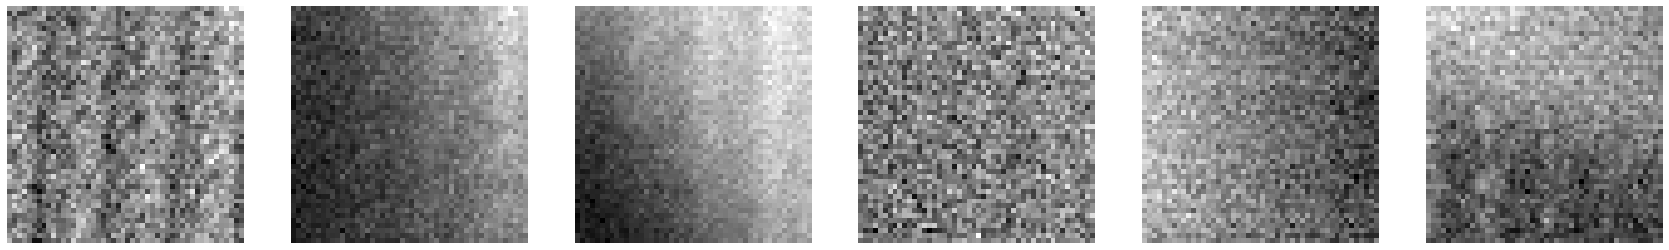

In [37]:
plt.figure(figsize=(5*10, 5)) 
s=0
for i in range(0,10):
    ax1=plt.subplot(1,10,i+1)
    ax1.imshow(centroids[i],cmap='gray')
    ax1.axis('off')
    s+=allTemplates[kmeans.labels_ == 5][i]


(-0.5, 47.5, 47.5, -0.5)

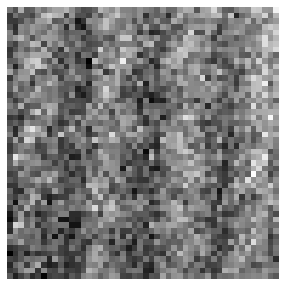

In [143]:
plt.figure(figsize=(5, 5)) 
s=s/10

ax1=plt.subplot(1,1,1)
ax1.imshow(s,cmap='gray')
ax1.axis('off')


In [136]:
# generating a smooth transistion map:
backplotwindow=np.zeros((templateSize, templateSize))
x = np.linspace(0, 1, backplotwindow.shape[0])
y = np.linspace(0, 1,  backplotwindow.shape[1])
xv, yv = np.meshgrid(x, y, sparse=True)
backplotwindow=np.exp(-((4*np.maximum(0,(xv-0.5))**2-0.1)+(4*np.maximum(0,(yv-0.5))**2-0.1)))   


In [137]:
   
overlay=[]
overlayCount=[]
overlayclass=[]

for i in range(len(imgs)):
    img = imgs[i]
    overlay.append(np.zeros(img.shape))
    overlayCount.append(np.zeros(img.shape))

n=0

for o in range(0,len(overlay)):
    for x in range(0, imgs[o].shape[0]-templateSize, stride):
        for y in range(0, imgs[o].shape[1]-templateSize, stride):
            key = kmeans.labels_[n]
            predicted_template = centroids[n]
            overlay[o][x:(x+templateSize),y:(y+templateSize)]+=predicted_template*backplotwindow
            overlayCount[o][x:(x+templateSize),y:(y+templateSize)]+=backplotwindow
            n+=1
            


In [138]:
imgBackplots = []
mymin=[]
mymax=[]
for i in range(len(imgs)):
    imgBackplots.append(overlay[i]/ ( overlayCount[i] + (np.double(overlayCount[i]==0))  ) ) 
    mymin.append(np.min(imgBackplots[i][imgBackplots[i]>np.min(imgBackplots[i][imgBackplots[i]>0])]))
    mymax.append(np.max(imgBackplots[i][imgBackplots[i]>0]))

In [25]:
import matplotlib.pyplot as plt

for i in range(len(imgs)):
    print(imgs[i].shape)
    plt.figure(figsize=(2*15, 2*7)) 
    ax1=plt.subplot(1,2,1)                    
    ax1.imshow(imgBackplots[i],cmap=plt.cm.gray,vmin=mymin[i], vmax=mymax[i])
    ax1.set_title('backplot')
    ax1.axis('off')
    ax2=plt.subplot(1,2,2)                    
    ax2.imshow(imgs[i],cmap=plt.cm.gray)
    ax2.set_title('original image')
    ax2.axis('off')
    #plt.figure(figsize=(15, 12))  
    #plt.imshow(overlayclass[Mode][myindex],cmap=plt.cm.gist_rainbow)
    #plt.colorbar()
    plt.show()

NameError: name 'imgs' is not defined

In [3]:
folderPath = 'C:/My Documents/TUD-MCL/Semester 4/Thesis/Implementation/Data/Dataset-2/'
imgName = 'Stack_zeolite4NaAF__111_001_1-10.tif'

imgs = helperfuncs.loadData(folderPath, imgName)



In [7]:
import matplotlib.pyplot as plt

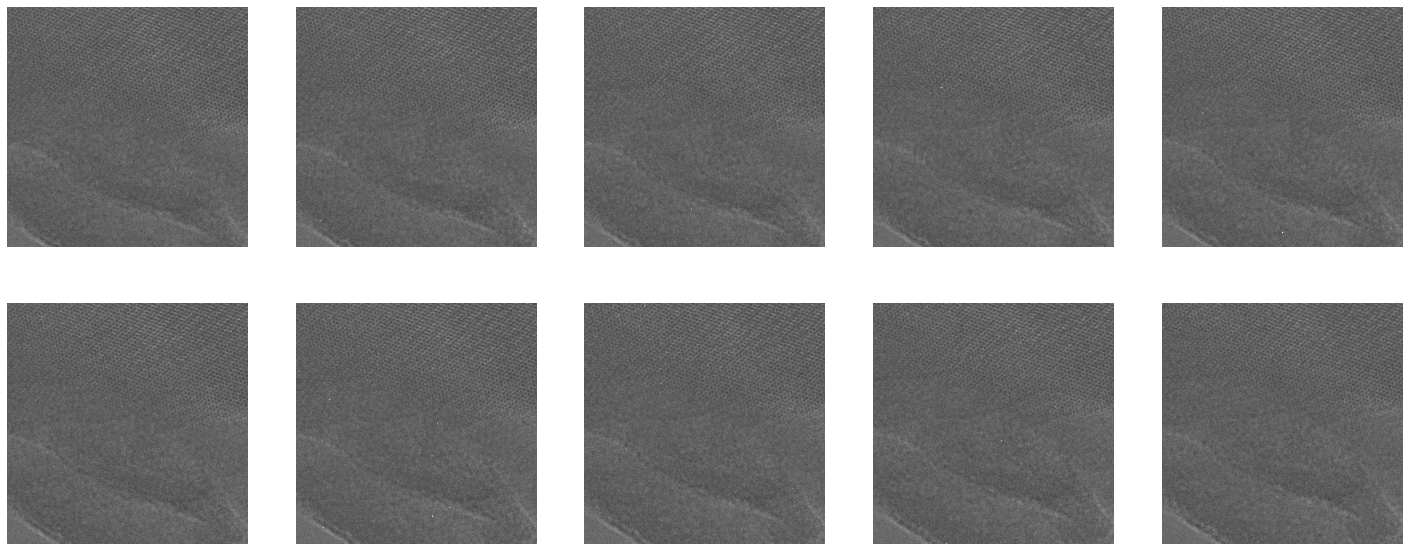

In [17]:
plt.figure(figsize=(5*5, 5*2)) 
s=0
for i in range(0,10):
    ax1=plt.subplot(2,5,i+1)
    ax1.imshow(imgs[i],cmap='gray', vmin=0,vmax=512)
    ax1.axis('off')

In [10]:
import numpy as np
import tensorflow as tf

adapt_data = np.array([1, 2, 3, 4, 5], dtype='int')
input_data = np.array([1., 2., 3.], dtype='float32')


In [16]:
layer = tf.keras.layers.experimental.preprocessing.Normalization(axis=1)

In [17]:
layer.adapt(adapt_data)


IndexError: tuple index out of range

In [20]:
a_string = "addbdcd"

a_string = a_string.replace("d", "")


print(a_string)

abc


In [23]:
x = 11

str(x)

'11'